# Plotting with Seaborn

In [2]:
import pandas as pd
reviews = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
import seaborn as sns

In [4]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Countplot

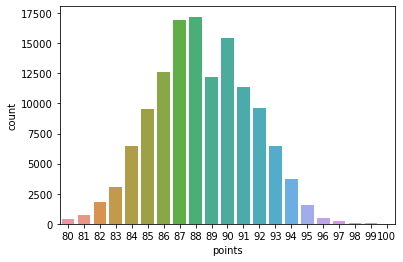

In [8]:
sns.countplot(reviews['points'])

# KDE Plot

KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

For example, suppose that there was just one wine priced 19.93\$, but several hundred prices 20.00\$. If we were to plot the value counts in a line chart, our line would dip very suddenly down to 1 and then back up to around 1000 again, creating a strangely "jagged" line. The line chart with the same data, shown below for the purposes of comparison, has exactly this problem!

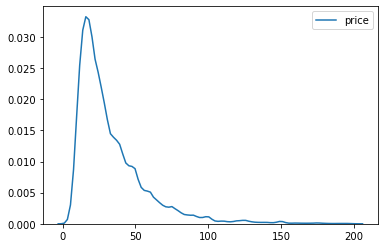

In [9]:
sns.kdeplot(reviews.query('price < 200').price)

### KDE plots can also be used in two dimensions.

Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots. They solve the same data overplotting issue that scatter plots suffer from and hex plots address, in a different but similarly visually appealing. However, note that bivariate KDE plots are very computationally intensive. We took a sample of 5000 points in this example to keep compute time reasonable.

/home/mds-student/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


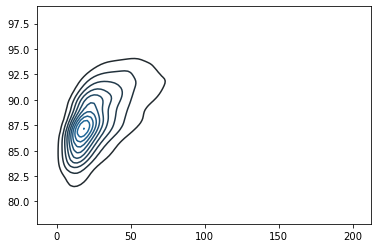

In [10]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))



#  Distplot

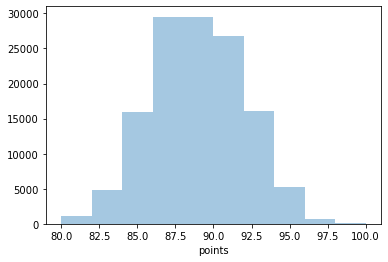

In [13]:
sns.distplot(reviews['points'], bins=10, kde=False)





# Scatterplot and hexplot

To plot two variables against one another in seaborn, we use jointplot

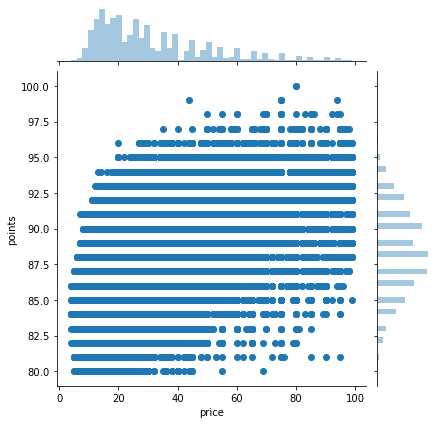

In [15]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

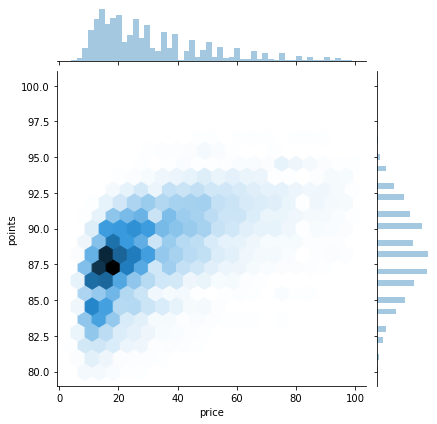

In [16]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', gridsize=20)



# Boxplot and violin plot

Boxplot meaning: 
![Boxplot meaning][boxplot]

[boxplot]: https://miro.medium.com/max/399/1*h9HRtvCSi3RWpJLtAohr0A.png "Boxplot meaning"

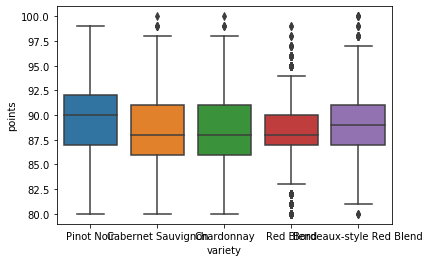

In [17]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

# Violin plot

A violinplot cleverly replaces the box in the boxplot with a kernel density estimate for the data. It shows basically the same data, but is harder to misinterpret and much prettier than the utilitarian boxplot.

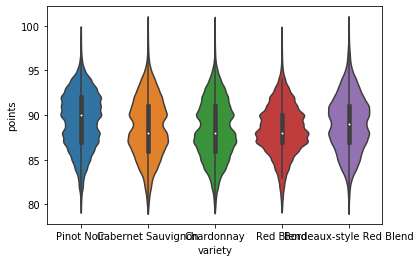

In [18]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)



# Count plot

In [19]:
pokemon = pd.read_csv('advertising.csv')

In [20]:
pokemon.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


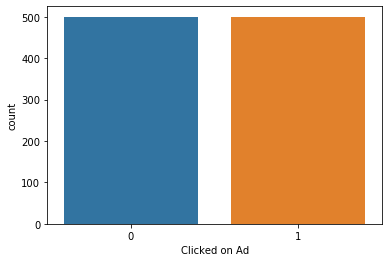

In [21]:
sns.countplot(pokemon['Clicked on Ad'])

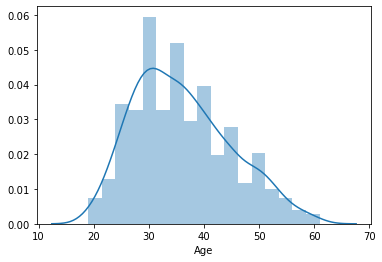

In [22]:
sns.distplot(pokemon['Age'])

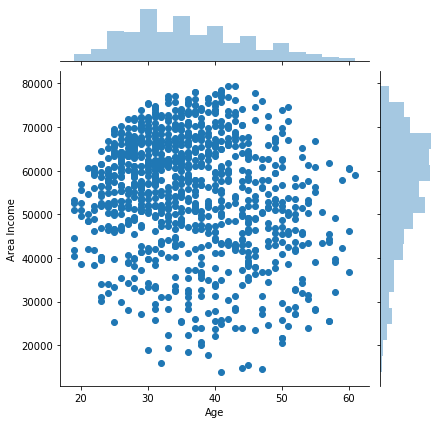

In [23]:
sns.jointplot(x='Age', y='Area Income', data=pokemon)

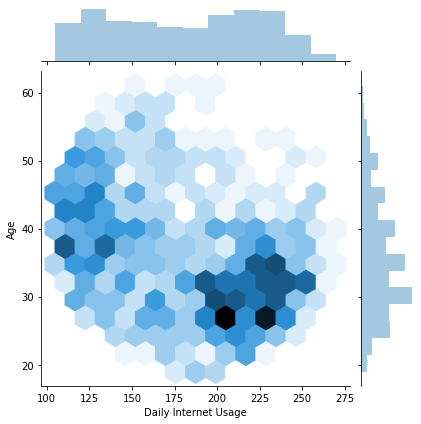

In [24]:
sns.jointplot(x='Daily Internet Usage', y='Age', data=pokemon, kind='hex')

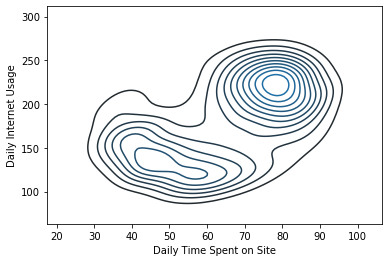

In [25]:
sns.kdeplot(pokemon['Daily Time Spent on Site'], pokemon['Daily Internet Usage'])

# LM Plot 

Show the results of a linear regression within each dataset

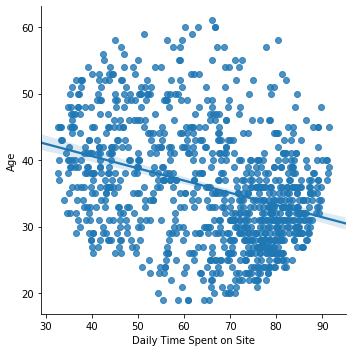

In [33]:
sns.lmplot(x='Daily Time Spent on Site', y='Age',data= pokemon)


# Heatmap

In [34]:
pokemon.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


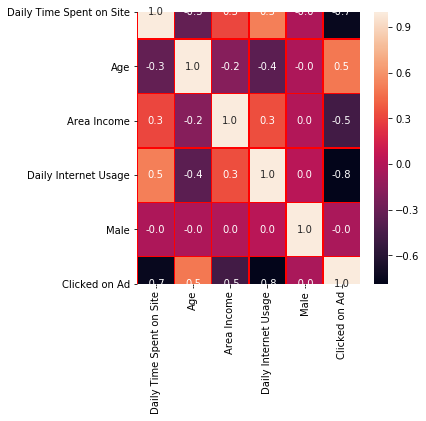

In [38]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(pokemon.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)

# Swarmplot


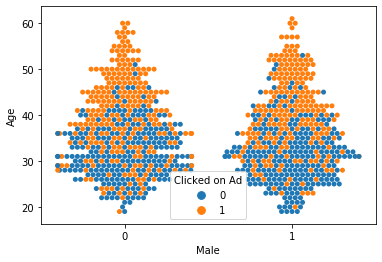

In [41]:
sns.swarmplot(x="Male", y="Age",hue="Clicked on Ad", data=pokemon)
plt.show()

# Pair Plot

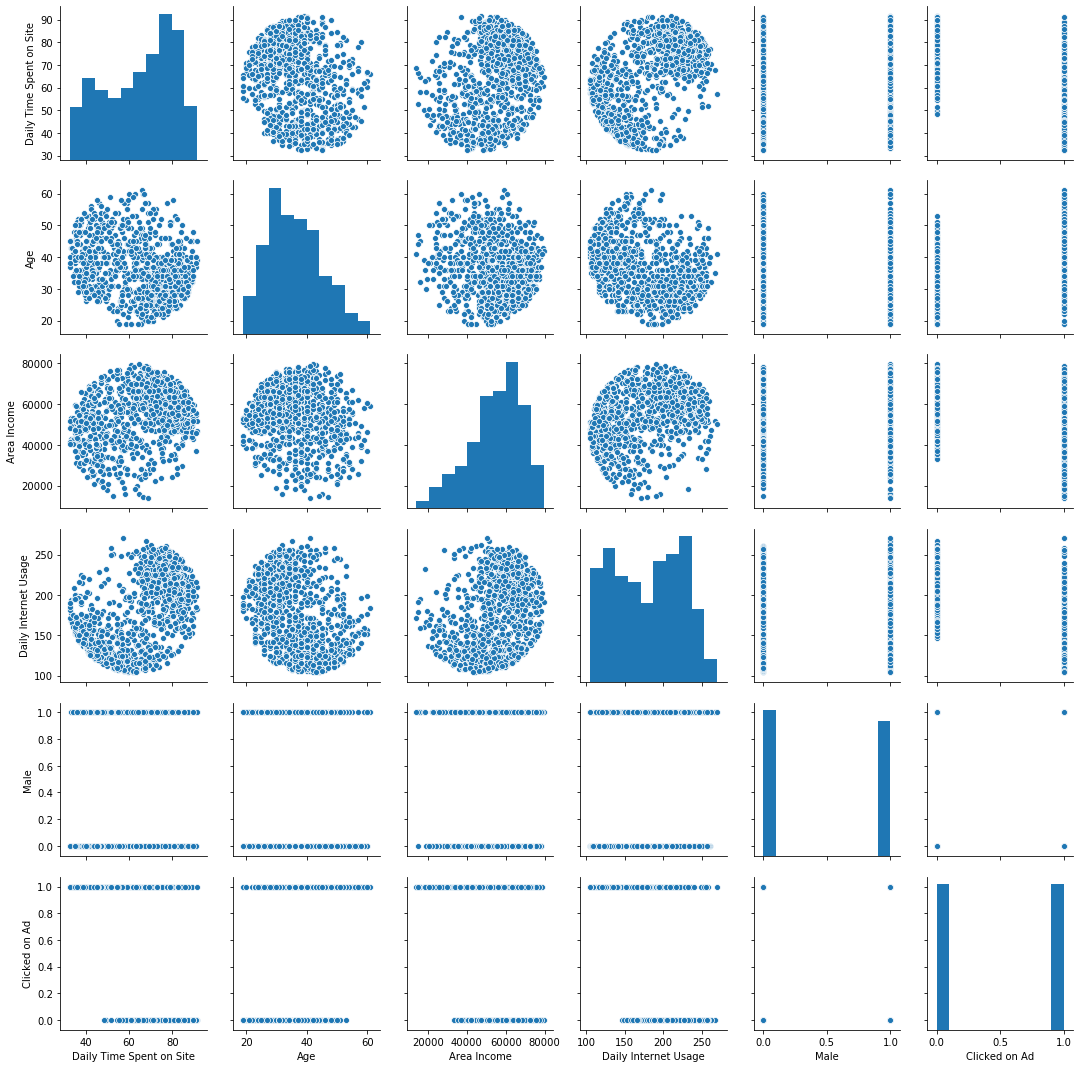

In [50]:
sns.pairplot(pokemon)

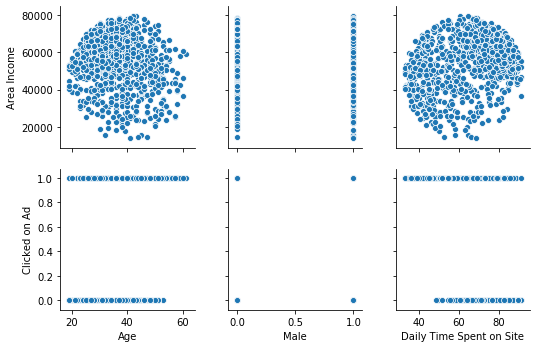

In [51]:
sns.pairplot(
    pokemon,
    x_vars=["Age", "Male", "Daily Time Spent on Site"],
    y_vars=["Area Income", "Clicked on Ad"],
)

# Bar plot

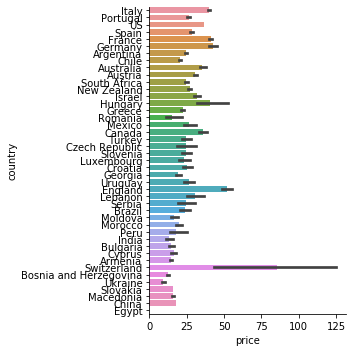

In [55]:
sns.catplot(x='price',
            y='country',
            data=reviews,
            kind='bar')